In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Google colab 올려진 데이터를 읽어 들임.
df = pd.read_csv('drive/MyDrive/creditcard.csv')

In [5]:
# 읽어 들인 데이터 확인.
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# 컬럼 수: 31개
# 레코드 수: 284,807

In [12]:
# 널 값이 포함된 레코드가 있는지 확인 함.
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# 널 값이 포함된 컬럼이 없음.

In [106]:
# 각 컬럼의 값의 범의 확인.
# 컬럼 수가 많아 함수로 정의해서 확인.
# 바 차트를 이용해서 Range 확인.
import matplotlib.pyplot as plt
# Range가 너무 클 경우를 대비해서 range를 함수 밖에 선언.
ranges = []
def print_min_max_ranges():
  for i in range(len(df.columns)):
    min_val = df.iloc[:, i].min()
    max_val = df.iloc[:, i].max()
    range_val = abs(max_val - min_val)
    ranges.append(range_val)
    print ("Variable: ", df.columns[i],  "  Min. {:.2f}".format(min_val),   "  Max.: {:.2f}".format(max_val), "  Range: {:.2f}".format(range_val))
  plt.figure(figsize = (20,7))
  plt.bar(df.columns, ranges)

Variable:  Time   Min. 0.00   Max.: 172792.00   Range: 172792.00
Variable:  V1   Min. -56.41   Max.: 2.45   Range: 58.86
Variable:  V2   Min. -72.72   Max.: 22.06   Range: 94.77
Variable:  V3   Min. -48.33   Max.: 9.38   Range: 57.71
Variable:  V4   Min. -5.68   Max.: 16.88   Range: 22.56
Variable:  V5   Min. -113.74   Max.: 34.80   Range: 148.54
Variable:  V6   Min. -26.16   Max.: 73.30   Range: 99.46
Variable:  V7   Min. -43.56   Max.: 120.59   Range: 164.15
Variable:  V8   Min. -73.22   Max.: 20.01   Range: 93.22
Variable:  V9   Min. -13.43   Max.: 15.59   Range: 29.03
Variable:  V10   Min. -24.59   Max.: 23.75   Range: 48.33
Variable:  V11   Min. -4.80   Max.: 12.02   Range: 16.82
Variable:  V12   Min. -18.68   Max.: 7.85   Range: 26.53
Variable:  V13   Min. -5.79   Max.: 7.13   Range: 12.92
Variable:  V14   Min. -19.21   Max.: 10.53   Range: 29.74
Variable:  V15   Min. -4.50   Max.: 8.88   Range: 13.38
Variable:  V16   Min. -14.13   Max.: 17.32   Range: 31.44
Variable:  V17   Min.

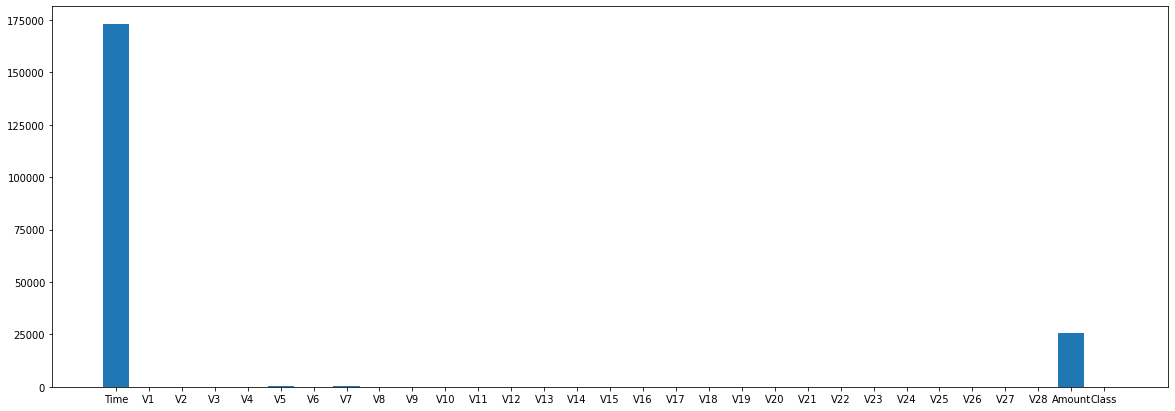

In [107]:
print_min_max_ranges()

In [108]:
# Time과 Amount 변수의 range가 너무 커 다른 변수들의 Range를 알 수 없기 때문에 두 변수를 제거한 range를 살펴 봄.
df_columns = df.columns[1:-2]

In [110]:
df_columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [111]:
len(df_columns)

28

In [113]:
ranges = ranges[1:-2]

In [115]:
len(ranges)

28

<BarContainer object of 28 artists>

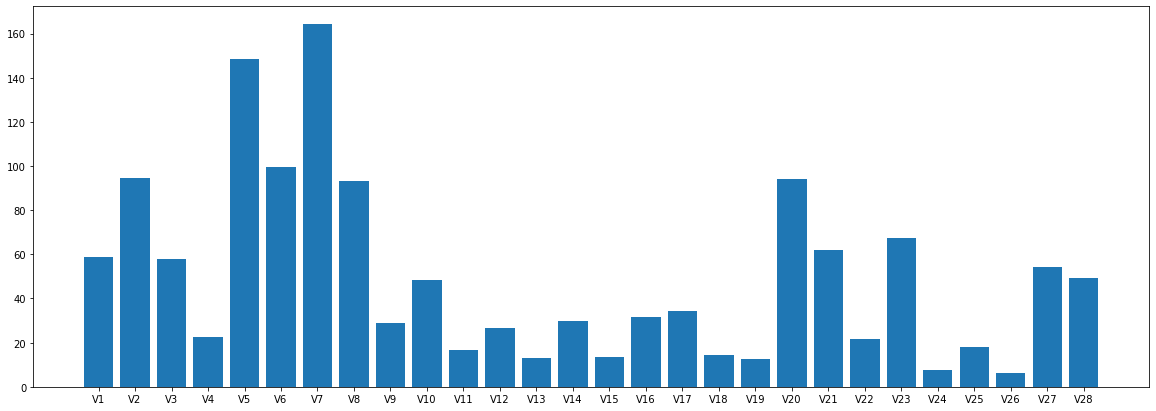

In [116]:
# TIme과 Amount변수들의 Range를 제거한 후에, 다른 변수들이 가지는 값의 Range 확인.
plt.figure(figsize = (20,7))
plt.bar(df_columns, ranges)

In [ ]:
# 위에 출력된 Range 값들을 보면 Time변수와 Amount 변수가 지나치게 큰 값들을 가지고 있다는 것을 확인 할 수 있음.
# 여기서 어떤 것을 하기 보다는 컬럼들이 지니고 있는 값들의 범위에 대해 인지만 하고 다음 과정 진행.

In [117]:
# 이상 탐지를 위해 Box Plot의 IQR 적용.
# Box Plot의 IQR
# 모든 값을 작은 것에서 부터 시작하여 Ascending으로 나열하여 
# 0 ---- Q1(25% 값들) ---- Q2(50%의 값들) ---- Q3(75%의 값들) ---- Q4(100%의 값들)
# 여기서 IQR이 의미하는 것은 Q1에서 Q3까지의 범위를 의미하며, 따라서 IQR=Q3-Q1 이 됨.
# Box Plot을 이용한 이상 값 정의는 다음과 같음.
# (IQR * 1.5)+Q3 = 최대값, (IQR*1.5)-Q1=최소값이 됨. 이를 그림화 하면
#    |--------------|-------------|---------------|-----------------|
# 0--10(최소값)      25%          50%(M)           75%               90(최대값)---100
# M은 Median을 의미함.
# 여기서 아웃 라이어가 되는 값은 최소값 보다 작거나 최대값 보다 큰 값들이 아웃라이어가 됨.

In [118]:
# 이상치 값을 제거하기 위해, 먼저 타겟 변수와 상관 관계가 높은 변수를 살펴봄.

In [119]:
 # 파이썬 seaborn의 corr를 import 함.
 import seaborn as sns

In [122]:
# 히트 맵이 아닌 수치로 먼저 확인
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

In [ ]:
# 수치로 보면 너무 복잡해서 알기가 힘듬.
# SEABORN을 이용함.

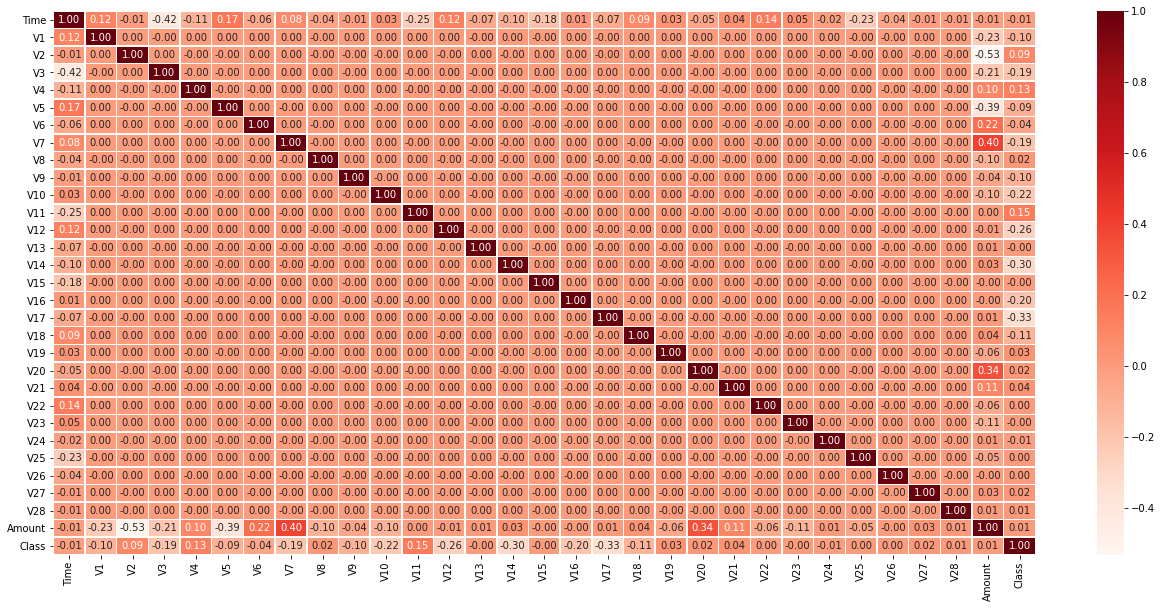

In [127]:
plt.figure(figsize=(22,10))
sns.heatmap(data = df.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

In [128]:
# 컬럼 V14와 컬럼 V17이 다른 컬럼들에 비해 타겟 변수와의 음의 관계가 강하게 나옴.
# 이 두 컬럼 확인.

Text(0.5, 1.0, 'V14 vs Class')

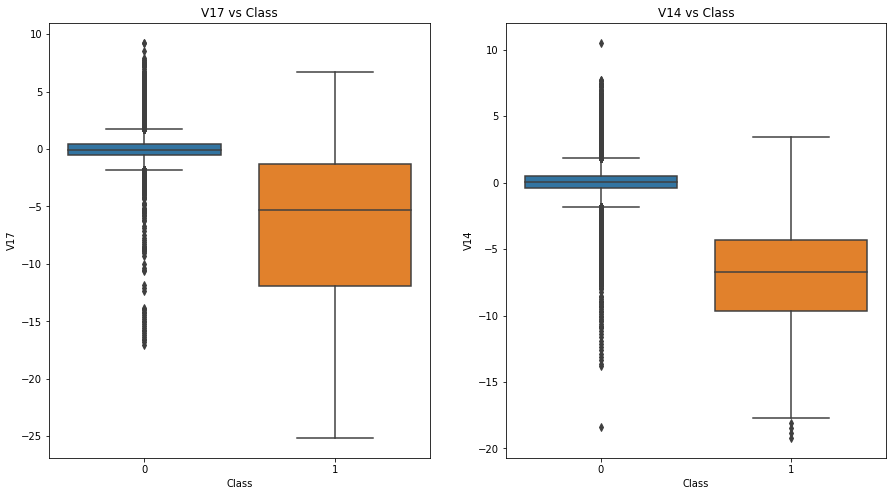

In [131]:
# Box Plot을 이용해서 확인 함.
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V17", data=df, ax=axes[0])
axes[0].set_title("V17 vs Class")

sns.boxplot(x="Class", y="V14", data=df, ax=axes[1])
axes[1].set_title("V14 vs Class")

In [132]:
# 두 컬럼이 뭔지는 모르겠지만, 0과 1에 대해 다른 분포를 보여주고 있어 분류를 하기에 유용하다고 판담함.
# 이 두 컬럼이 다른 컬럼들에 비해 0과 1에 대한 분류 모델에 사용하기에 정말 유용한지 다른 컬럼도 같이 확인해 봄.

Text(0.5, 1.0, 'V2 vs Class')

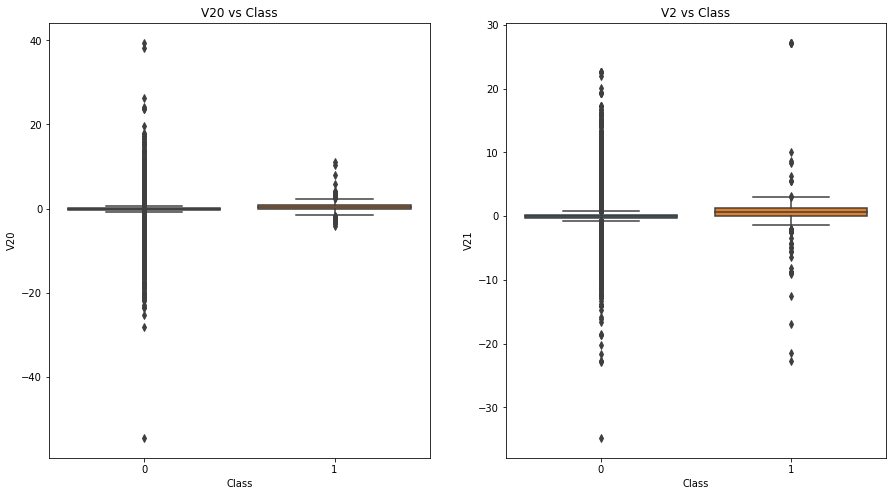

In [133]:
f, axes = plt.subplots(ncols=2, figsize=(15,8))

sns.boxplot(x="Class", y="V20", data=df, ax=axes[0])
axes[0].set_title("V20 vs Class")

sns.boxplot(x="Class", y="V21", data=df, ax=axes[1])
axes[1].set_title("V2 vs Class")

In [134]:
# V14와 V17에 이어, V20과 V21을 보면, V20과 V21은 V14와 V17에 비해 0과 1에 대한 특성이 있는 분포를 보여주지 않고,
# 0과 1에 대해 비슷한 분포를 가지고 있다는 것을 확인 할 수 있어, V20과 V21은 0과 1을 구별하는데 좋은 변수가 될 수 없다고 생각할 수 있음.